In [50]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import models
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras import backend as K

In [72]:
# dimensions of our images.
img_width, img_height = 150, 150

#paths
train_data_dir = 'C:\\Users\\joseh\\Desktop\\chest\\train\\'
validation_data_dir = 'C:\\Users\\joseh\\Desktop\\chest\\test\\'

#number of images for trainig and testing
nb_train_samples = 1527
nb_validation_samples = 420

#epochs, batch size and number of classes
epochs = 25
batch_size = 16
number_classes = 22

In [56]:
#Adjusting shape
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [57]:
#CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_classes))
model.add(Activation('softmax'))

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        18496     
__________

In [58]:
#Rest
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [59]:
#Configuration for training
#We rescale la image, make some rotation, zoom the image and change the brightness a little bit 
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=15,
        zoom_range=0.5,
        brightness_range=(0.0, 1.9),
        fill_mode='nearest')

In [60]:
#Augmentation configuration for testing: only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [61]:
#Getting images for trainig
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1527 images belonging to 22 classes.


In [62]:
#Getting images for validation
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 420 images belonging to 22 classes.


In [73]:
#training
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/25
95/95 [==============================] - 44s 461ms/step - loss: 0.0678 - acc: 0.9760 - val_loss: 0.4568 - val_acc: 0.9256
Epoch 2/25
95/95 [==============================] - 46s 483ms/step - loss: 0.0663 - acc: 0.9760 - val_loss: 0.6039 - val_acc: 0.9246
Epoch 3/25
95/95 [==============================] - 44s 466ms/step - loss: 0.0649 - acc: 0.9773 - val_loss: 0.5113 - val_acc: 0.9275
Epoch 4/25
95/95 [==============================] - 45s 476ms/step - loss: 0.0616 - acc: 0.9784 - val_loss: 0.4273 - val_acc: 0.9343
Epoch 5/25
95/95 [==============================] - 49s 512ms/step - loss: 0.0574 - acc: 0.9800 - val_loss: 0.8133 - val_acc: 0.9180
Epoch 6/25
95/95 [==============================] - 47s 494ms/step - loss: 0.0580 - acc: 0.9801 - val_loss: 0.5980 - val_acc: 0.9215
Epoch 7/25
95/95 [==============================] - 52s 551ms/step - loss: 0.0589 - acc: 0.9790 - val_loss: 0.5318 - val_acc: 0.9295
Epoch 8/25
95/95 [==============================] - 53s 561ms/step - 

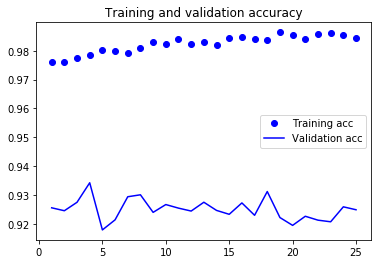

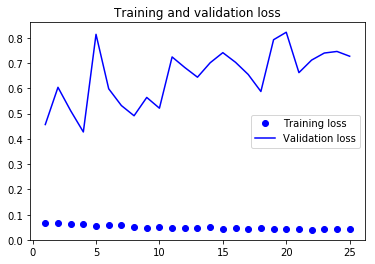

In [74]:
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt

#Used to plot a graph. It is useful to know if the model is overfitting

#Variables from history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Plotting the graph
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [65]:
#Saving the model
model.save('model_22letters_6.h5')

In [15]:
# Extracts the outputs of the top 12 layers
layer_outputs = [layer.output for layer in model.layers[:12]] 

# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

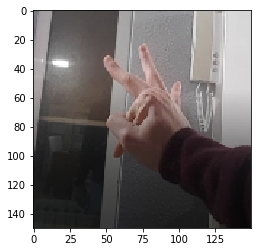

In [75]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import array_to_img, img_to_array, load_img, image

img = image.load_img('C:\\Users\\joseh\\Desktop\\Test2\\T.png', target_size=(img_width, img_height))  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

imgplot = plt.imshow(img)

model.predict_proba(x)#model.predict_generator(generator,10)

In [20]:
activations = activation_model.predict(x) 
# Returns a list of five Numpy arrays: one array per layer activation

In [21]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


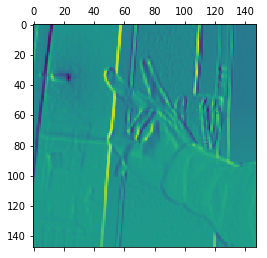

In [22]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

In [76]:
#Data to create the confusion matrix
matrix_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode = 'categorical')

Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
Y_test = model.predict_generator(matrix_generator, nb_validation_samples // batch_size + 1)
y_test = np.argmax(Y_test, axis=1)

Found 420 images belonging to 22 classes.


In [77]:
#Print the confusion matrix
print(confusion_matrix(matrix_generator.classes, y_test))

[[ 0  0  1  0  0  0  1  1  0  6  0  0  0  2  0  2  6  0  0  0  0  4]
 [ 0  0  0  1  0  0  2  0  0  2  0  0  0  1  0  1  3  0  0  0  3  5]
 [ 0  0  1  0  0  0  1  2  0  2  0  0  0  4  0  1  5  0  0  0  2  3]
 [ 0  0  0  1  0  0  4  1  0  3  0  0  0  3  0  0  5  0  0  0  0  1]
 [ 0  0  1  0  0  0  3  0  0  3  0  1  0  1  0  3 12  0  0  0  3  7]
 [ 0  0  0  0  0  0  0  1  0  1  0  0  0  6  0  0  3  0  0  0  0  3]
 [ 0  0  0  0  0  0  1  0  0  1  0  0  0  3  0  1  6  0  0  0  1  3]
 [ 0  0  0  2  1  0  1  1  0  4  0  0  1  3  0  5  6  0  0  0  1  2]
 [ 0  0  0  0  0  0  2  0  0  1  0  0  1  3  0  0  1  0  0  0  4  2]
 [ 0  0  0  1  0  0  3  0  0  2  0  0  1  1  0  2  7  0  0  0  2  5]
 [ 0  0  0  0  0  0  2  1  0  1  0  0  0  1  0  2  4  0  0  0  3  2]
 [ 0  0  1  0  0  0  0  1  0  2  0  1  0  2  0  1  4  0  0  0  1  3]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  1  0  1  8  0  0  0  2  2]
 [ 0  0  0  0  0  0  3  2  0  2  0  0  1  1  0  2  8  0  0  0  4  7]
 [ 0  0  0  0  1  0  0  0  0  3  0

In [78]:
#Classiffication report

target_names = ['A','B','C','CH','D','E','F','G','H','I','K','L','O','P','Q','R','T','U','V','W','X','Y']

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        23
           B       0.00      0.00      0.00        18
           C       0.00      0.00      0.00        21
          CH       0.00      0.00      0.00        18
           D       0.00      0.00      0.00        34
           E       0.00      0.00      0.00        14
           F       0.09      0.19      0.12        16
           G       0.08      0.04      0.05        27
           H       0.00      0.00      0.00        14
           I       0.04      0.08      0.05        24
           K       0.00      0.00      0.00        16
           L       0.00      0.00      0.00        16
           O       0.17      0.06      0.09        16
           P       0.13      0.23      0.17        30
           Q       0.00      0.00      0.00        22
           R       0.04      0.06      0.05        16
           T       0.02      0.10      0.03        20
           U       0.00    

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

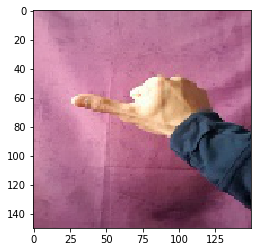

In [100]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import array_to_img, img_to_array, load_img, image

img = image.load_img('C:\\Users\\joseh\\Desktop\\chest\\test\\a\\60.jpg', target_size=(img_width, img_height))  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

imgplot = plt.imshow(img)

model.predict_proba(x)#model.predict_generator(generator,10)